In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the dataset
data = pd.read_csv("boston_house_prices.csv")

In [3]:
# Separate features (X) and target variable (y)
X = data.drop("MEDV", axis=1)
y = data["MEDV"]

In [4]:
# Standardize the features
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

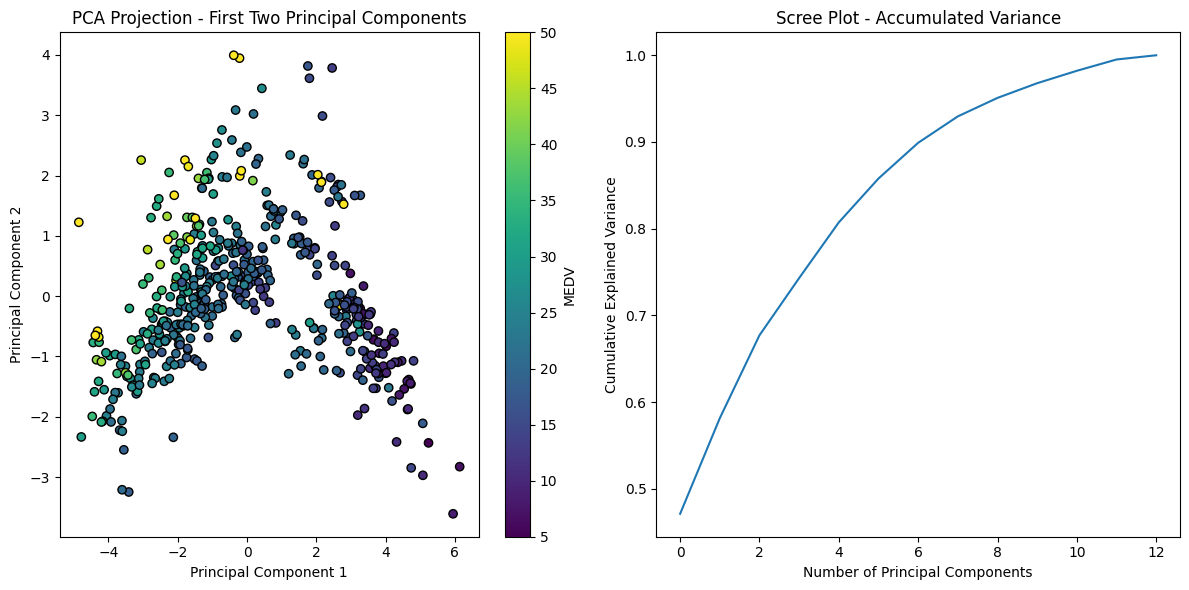

In [5]:
# Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_std)

# Plot the PCA projection in two dimensions
plt.figure(figsize=(12, 6))

# Colored scatter plot of the first two principal components
plt.subplot(1, 2, 1)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('PCA Projection - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(label='MEDV')

# Scree plot with the accumulated variance
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.title('Scree Plot - Accumulated Variance')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')

plt.tight_layout()
plt.show()


In [6]:
pip install scikit-learn seaborn somoclu

     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
     ---------------------------------------- 0.0/1.6 MB ? eta -:--:--
      --------------------------------------- 0.0/1.6 MB 217.9 kB/s eta 0:00:08
      --------------------------------------- 0.0/1.6 MB 262.6 kB/s eta 0:00:06
     -- ------------------------------------- 0.1/1.6 MB 726.2 kB/s eta 0:00:03
     ---------------- ----------------------- 0.6/1.6 MB 3.1 MB/s eta 0:00:01
     -------------------------- ------------- 1.0/1.6 MB 4.4 MB/s eta 0:00:01
     -------------------------- ------------- 1.0/1.6 MB 4.4 MB/s eta 0:00:01
     -------------------------- ------------- 1.0/1.6 MB 4.4 MB/s eta 0:00:01
     -------------------------- ------------- 1.0/1.6 MB 4.4 MB/s eta 0:00:01
     -------------------------- ------------- 1.0/1.6 MB 4.4 MB/s eta 0:00:01
     ---------------------------- ----------- 1.1/1.6 MB 2.4 MB/s eta 0:00:01
     ---------------------------------------  1.6/1.6 MB 3.1 MB/s eta 0:

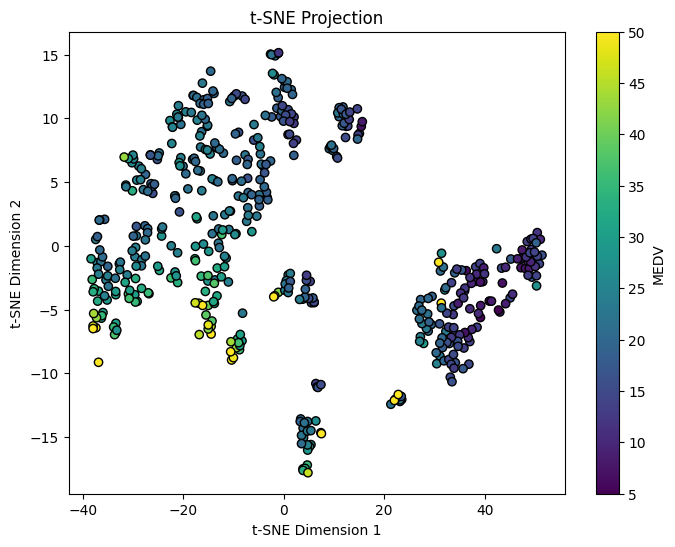

In [7]:
from sklearn.manifold import TSNE

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_std)

# Plot t-SNE projection
plt.figure(figsize=(8, 6))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title('t-SNE Projection')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.colorbar(label='MEDV')
plt.show()


c:\Users\PRJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


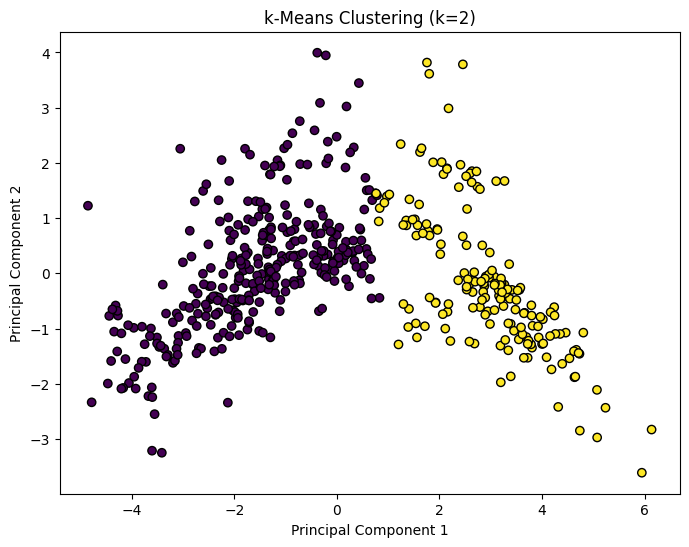

c:\Users\PRJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


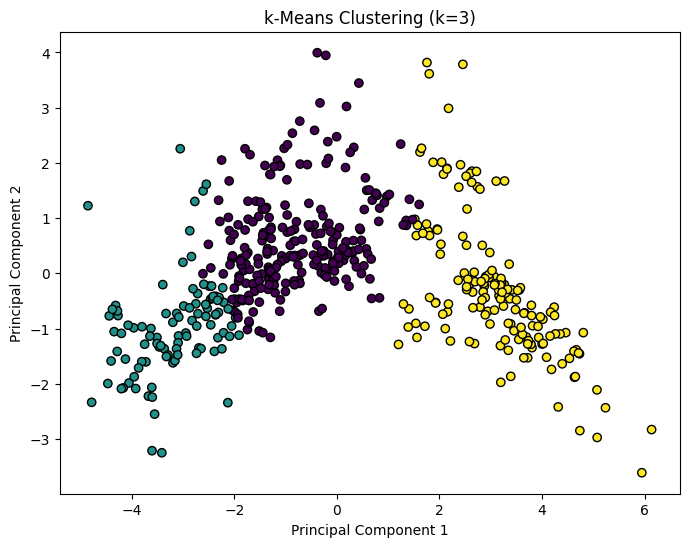

c:\Users\PRJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


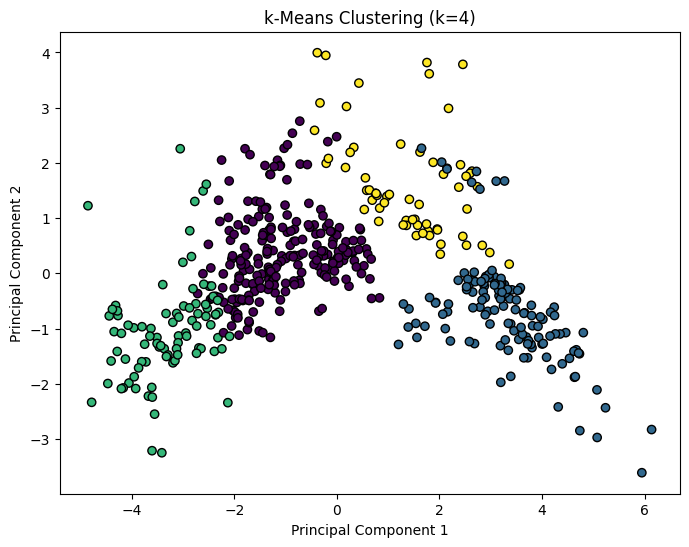

c:\Users\PRJA\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


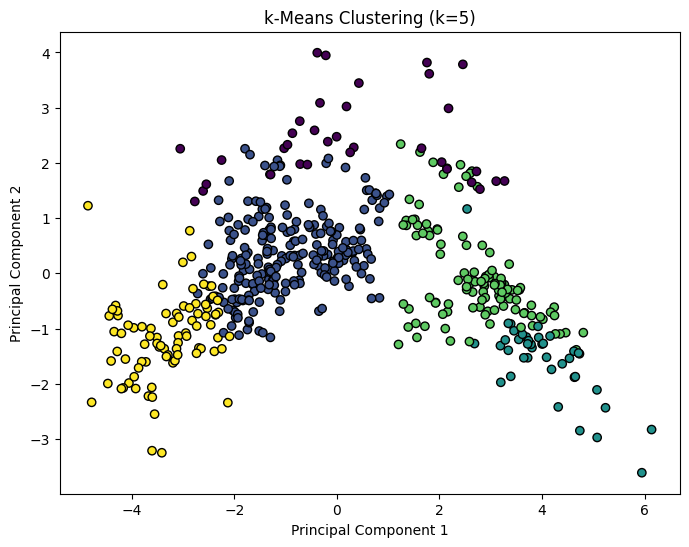

In [8]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Function to visualize k-means results
def visualize_kmeans(X, k, y_true):
    kmeans = KMeans(n_clusters=k, random_state=42)
    y_pred = kmeans.fit_predict(X)

    plt.figure(figsize=(8, 6))
    plt.scatter(X[:, 0], X[:, 1], c=y_pred, cmap='viridis', edgecolor='k')
    plt.title(f'k-Means Clustering (k={k})')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

    if k == len(np.unique(y_true)):
        confusion = confusion_matrix(y_true, y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(confusion, annot=True, fmt='d', cmap='viridis', cbar=False,
                    xticklabels=np.unique(y_true), yticklabels=np.unique(y_true))
        plt.title('Confusion Matrix')
        plt.xlabel('Predicted Class')
        plt.ylabel('True Class')
        plt.show()

# Visualize k-means for k=2, 3, ..., K
for k in range(2, 6):
    visualize_kmeans(X_pca, k, y)


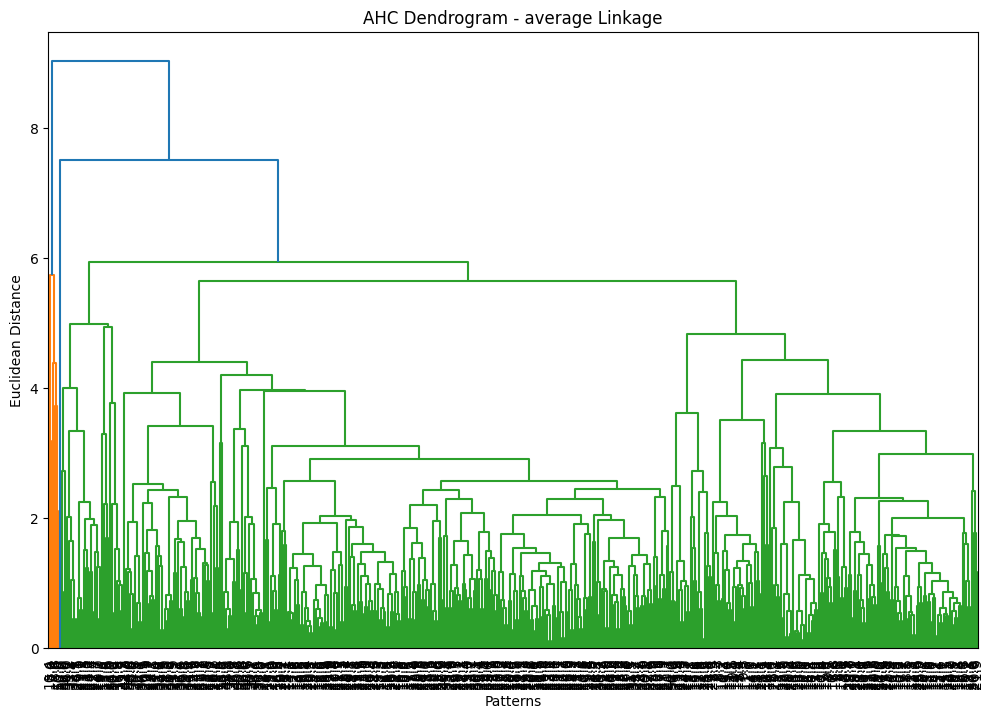

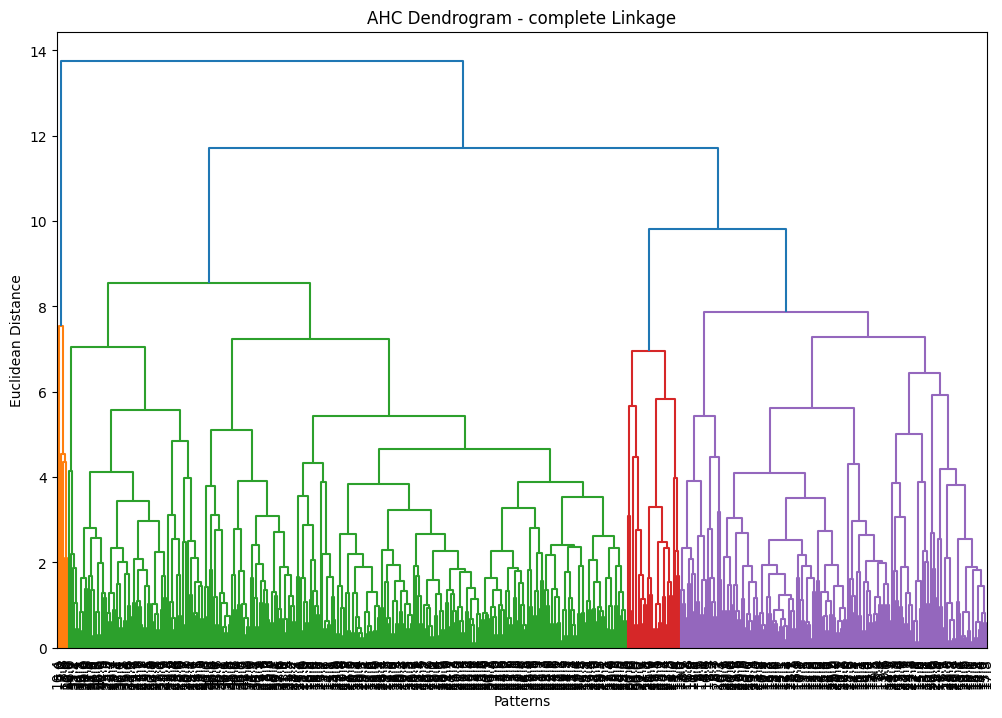

In [9]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Apply AHC with UPGMA and complete linkage
methods = ['average', 'complete']
for method in methods:
    linkage_matrix = linkage(X_std, method=method, metric='euclidean')

    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix, labels=y.values, leaf_font_size=10)
    plt.title(f'AHC Dendrogram - {method} Linkage')
    plt.xlabel('Patterns')
    plt.ylabel('Euclidean Distance')
    plt.show()


In [11]:
pip install scikit-learn seaborn somoclu

Note: you may need to restart the kernel to use updated packages.


In [18]:
pip install MiniSom


Note: you may need to restart the kernel to use updated packages.


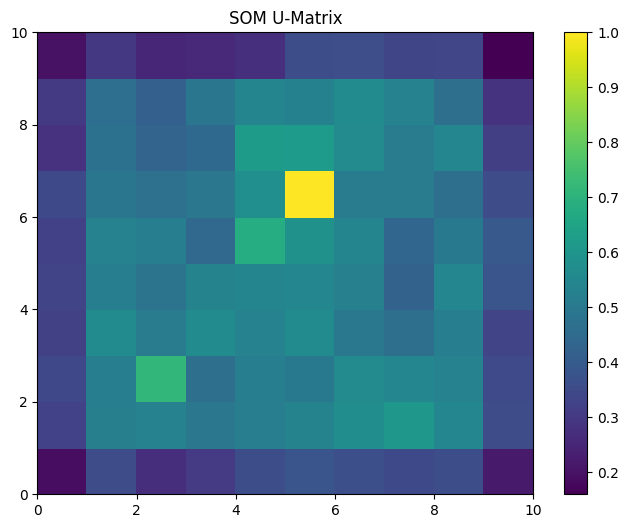

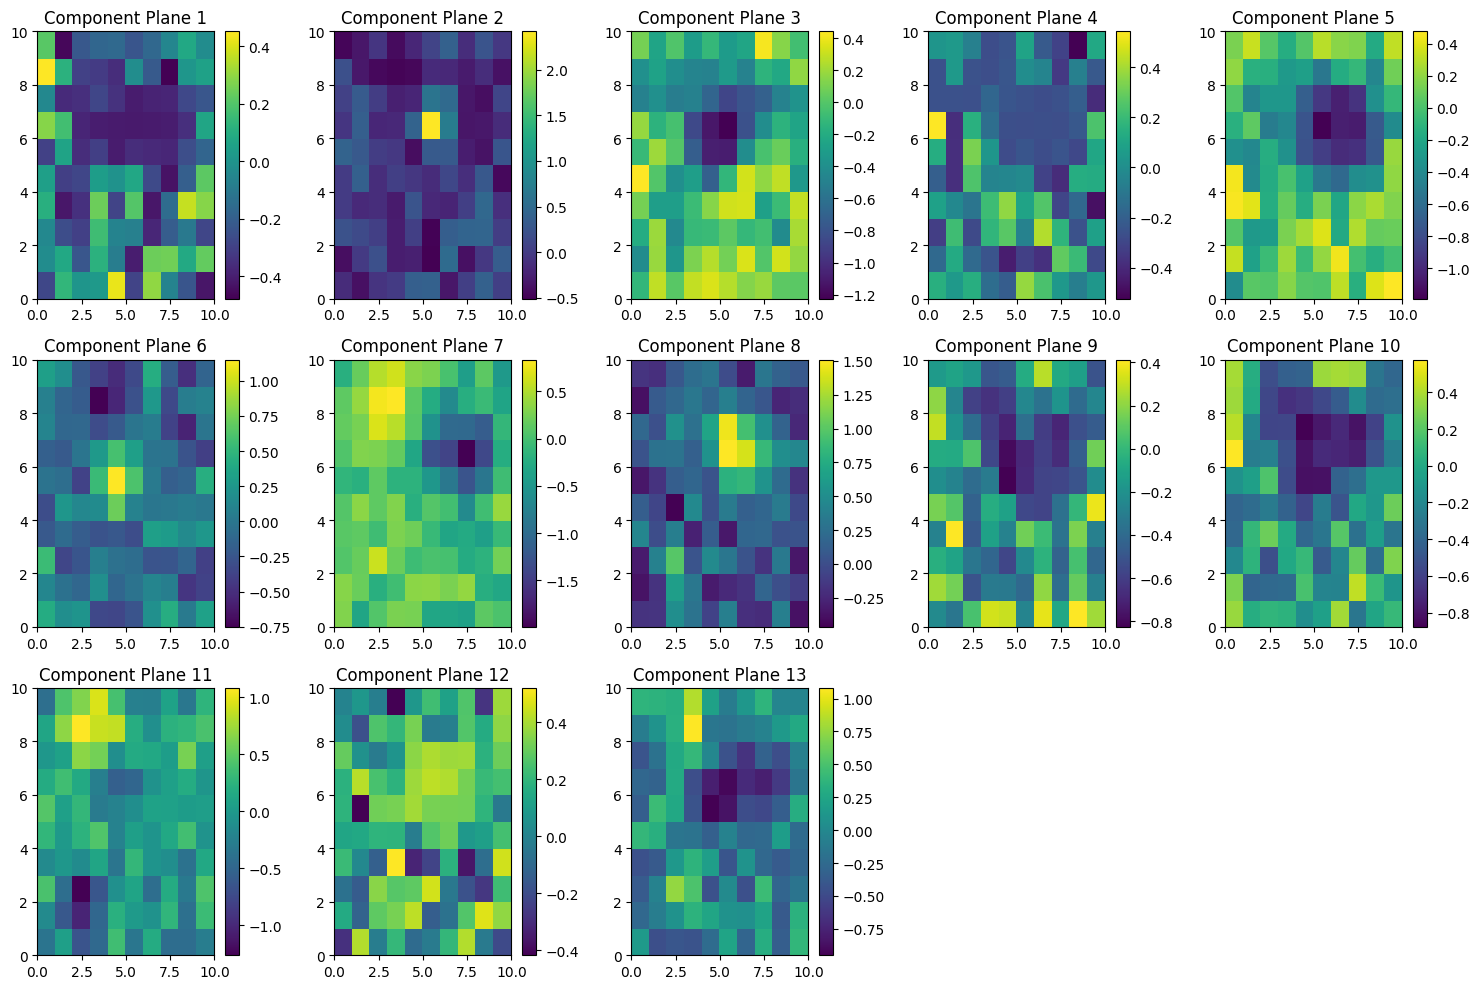

In [22]:
from minisom import MiniSom
import numpy as np

# Define the size of the SOM grid
grid_size = (10, 10)

# Create and train the SOM
som = MiniSom(grid_size[0], grid_size[1], input_len=X_std.shape[1], sigma=1.0, learning_rate=0.5)
som.train_random(X_std, 100)  # You can adjust the number of iterations (here, 100)

# U-Matrix visualization
plt.figure(figsize=(8, 6))
umatrix = som.distance_map()
plt.pcolor(umatrix, cmap='viridis')
plt.colorbar()
plt.title('SOM U-Matrix')
plt.show()

# Component Planes visualization for the "best" map
plt.figure(figsize=(15, 10))
for i in range(X_std.shape[1]):
    plt.subplot(3, 5, i + 1)
    som_component_plane = som.get_weights()[:, :, i]
    plt.pcolor(som_component_plane, cmap='viridis')
    plt.colorbar()
    plt.title(f'Component Plane {i + 1}')

plt.tight_layout()
plt.show()
